# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [49]:
data = pd.read_csv('Data.csv')

In [50]:
data.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9


In [51]:
data.shape

(4332, 7)

# Performing Descriptive Statistics

In [52]:
# lets check descriptive statistics for numerical columns
data.describe().style.background_gradient(cmap = 'cividis')

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,1961.224377,227.582410,344.361657,288.907018,197.399931,1057.105217
std,34.869503,232.087633,268.229923,189.930239,136.681781,706.555790
min,1901.000000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,1931.000000,70.400000,173.875000,155.000000,99.875000,565.925000
50%,1961.000000,137.650000,283.250000,258.000000,172.900000,877.300000
75%,1991.000000,303.725000,416.175000,377.625000,266.500000,1287.900000
max,2021.000000,1609.900000,2362.800000,1664.600000,1222.000000,4536.900000


In [53]:
# lets check descriptive statistics for categorical columns
data.describe(include = 'object')

,subdivision
count,4332
unique,36
top,WEST MADHYA PRADESH
freq,121


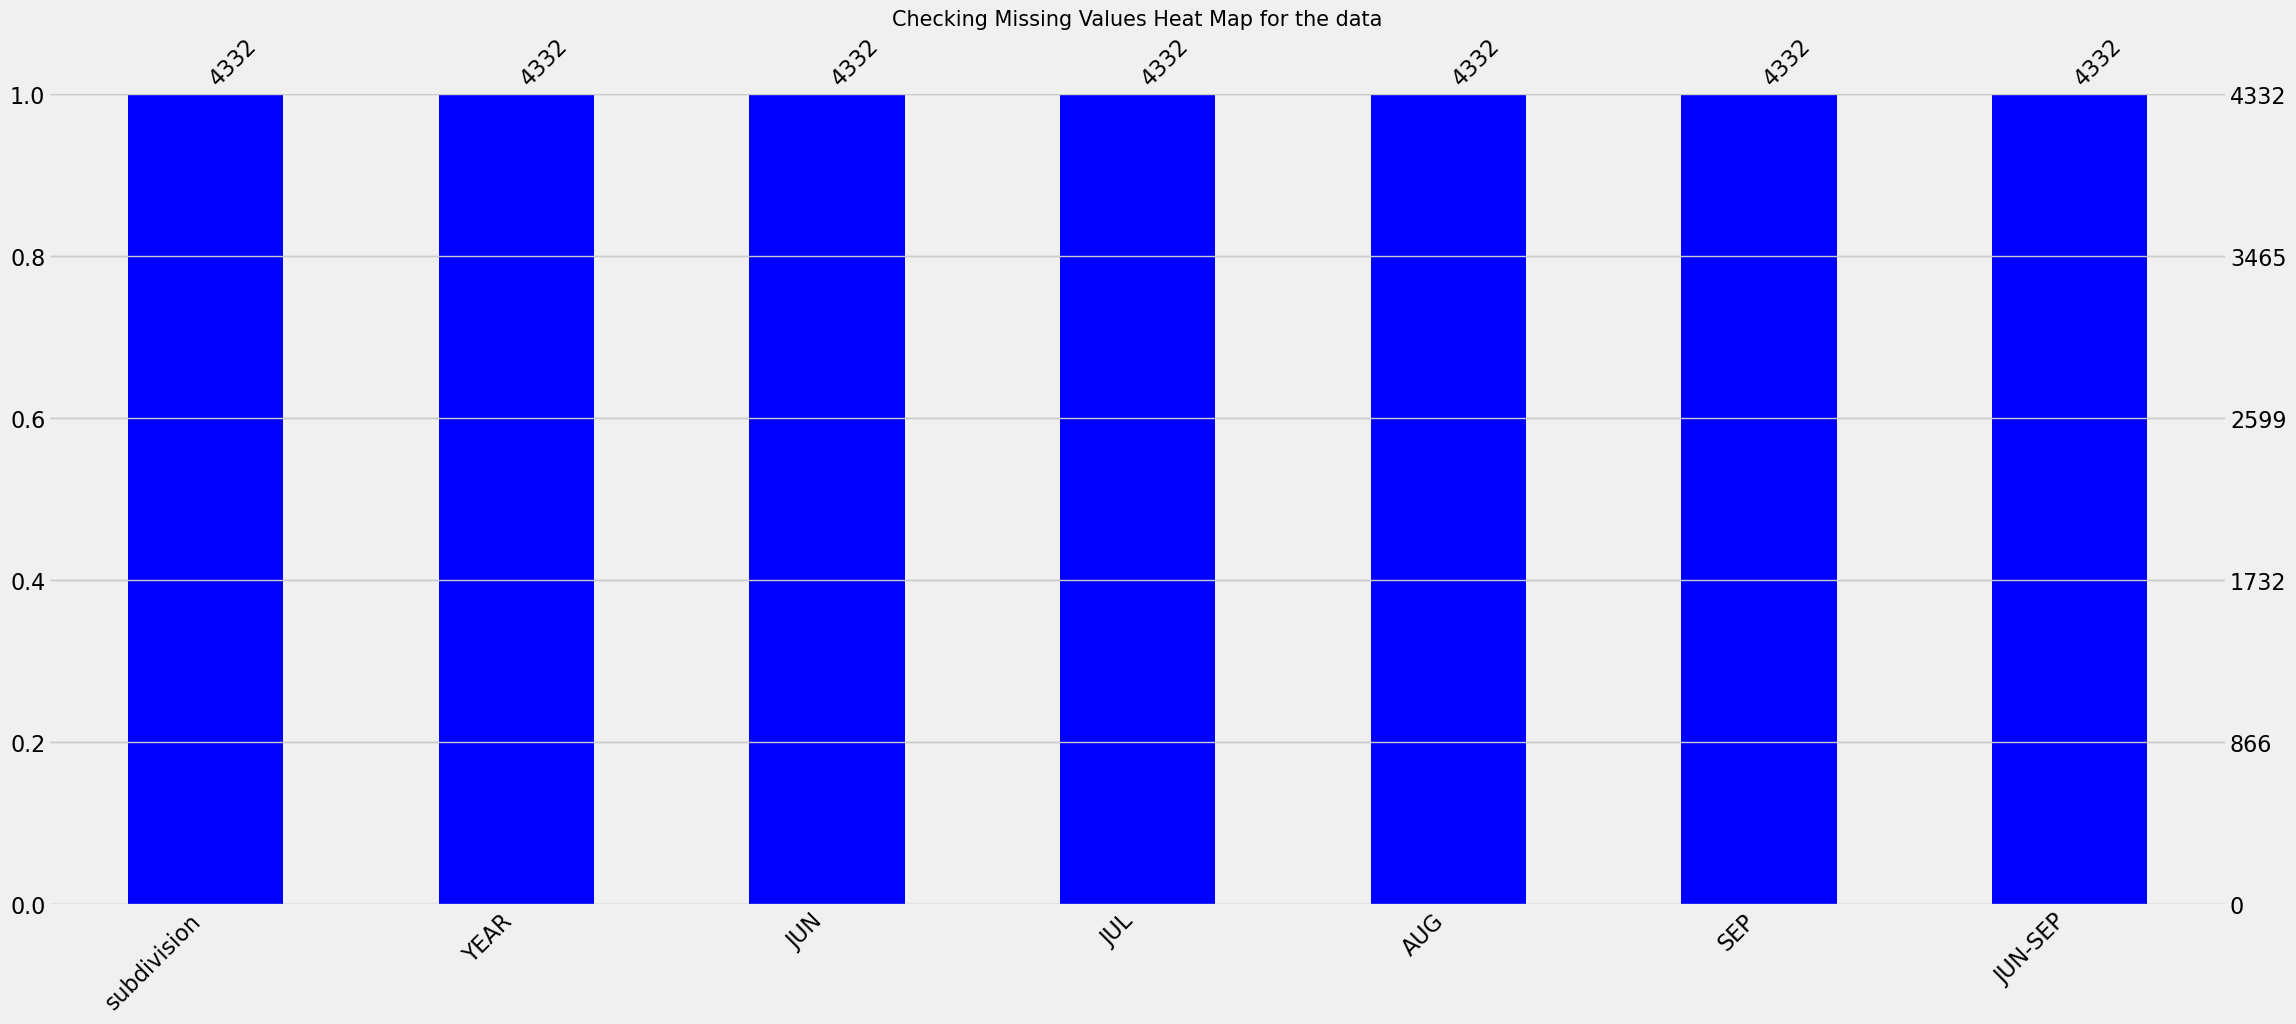

In [54]:
# checking if the data contains any NULL value
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, :7],
        color = 'blue',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for the data', fontsize = 15)
plt.show()

In [55]:
data.isnull().sum()

subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP        0
dtype: int64

In [56]:
total = data.isnull().sum()

# lets calculate the percentage of missing values in the dataset
percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
missing_data = pd.concat([total, percent],
                                axis=1, 
                                keys=['Total', 'Percent %'],
                                sort = True)



In [57]:
missing_data

,Total,Percent %
AUG,0,0.0
JUL,0,0.0
JUN,0,0.0
JUN-SEP,0,0.0
SEP,0,0.0
YEAR,0,0.0
subdivision,0,0.0


# Outlier Detection

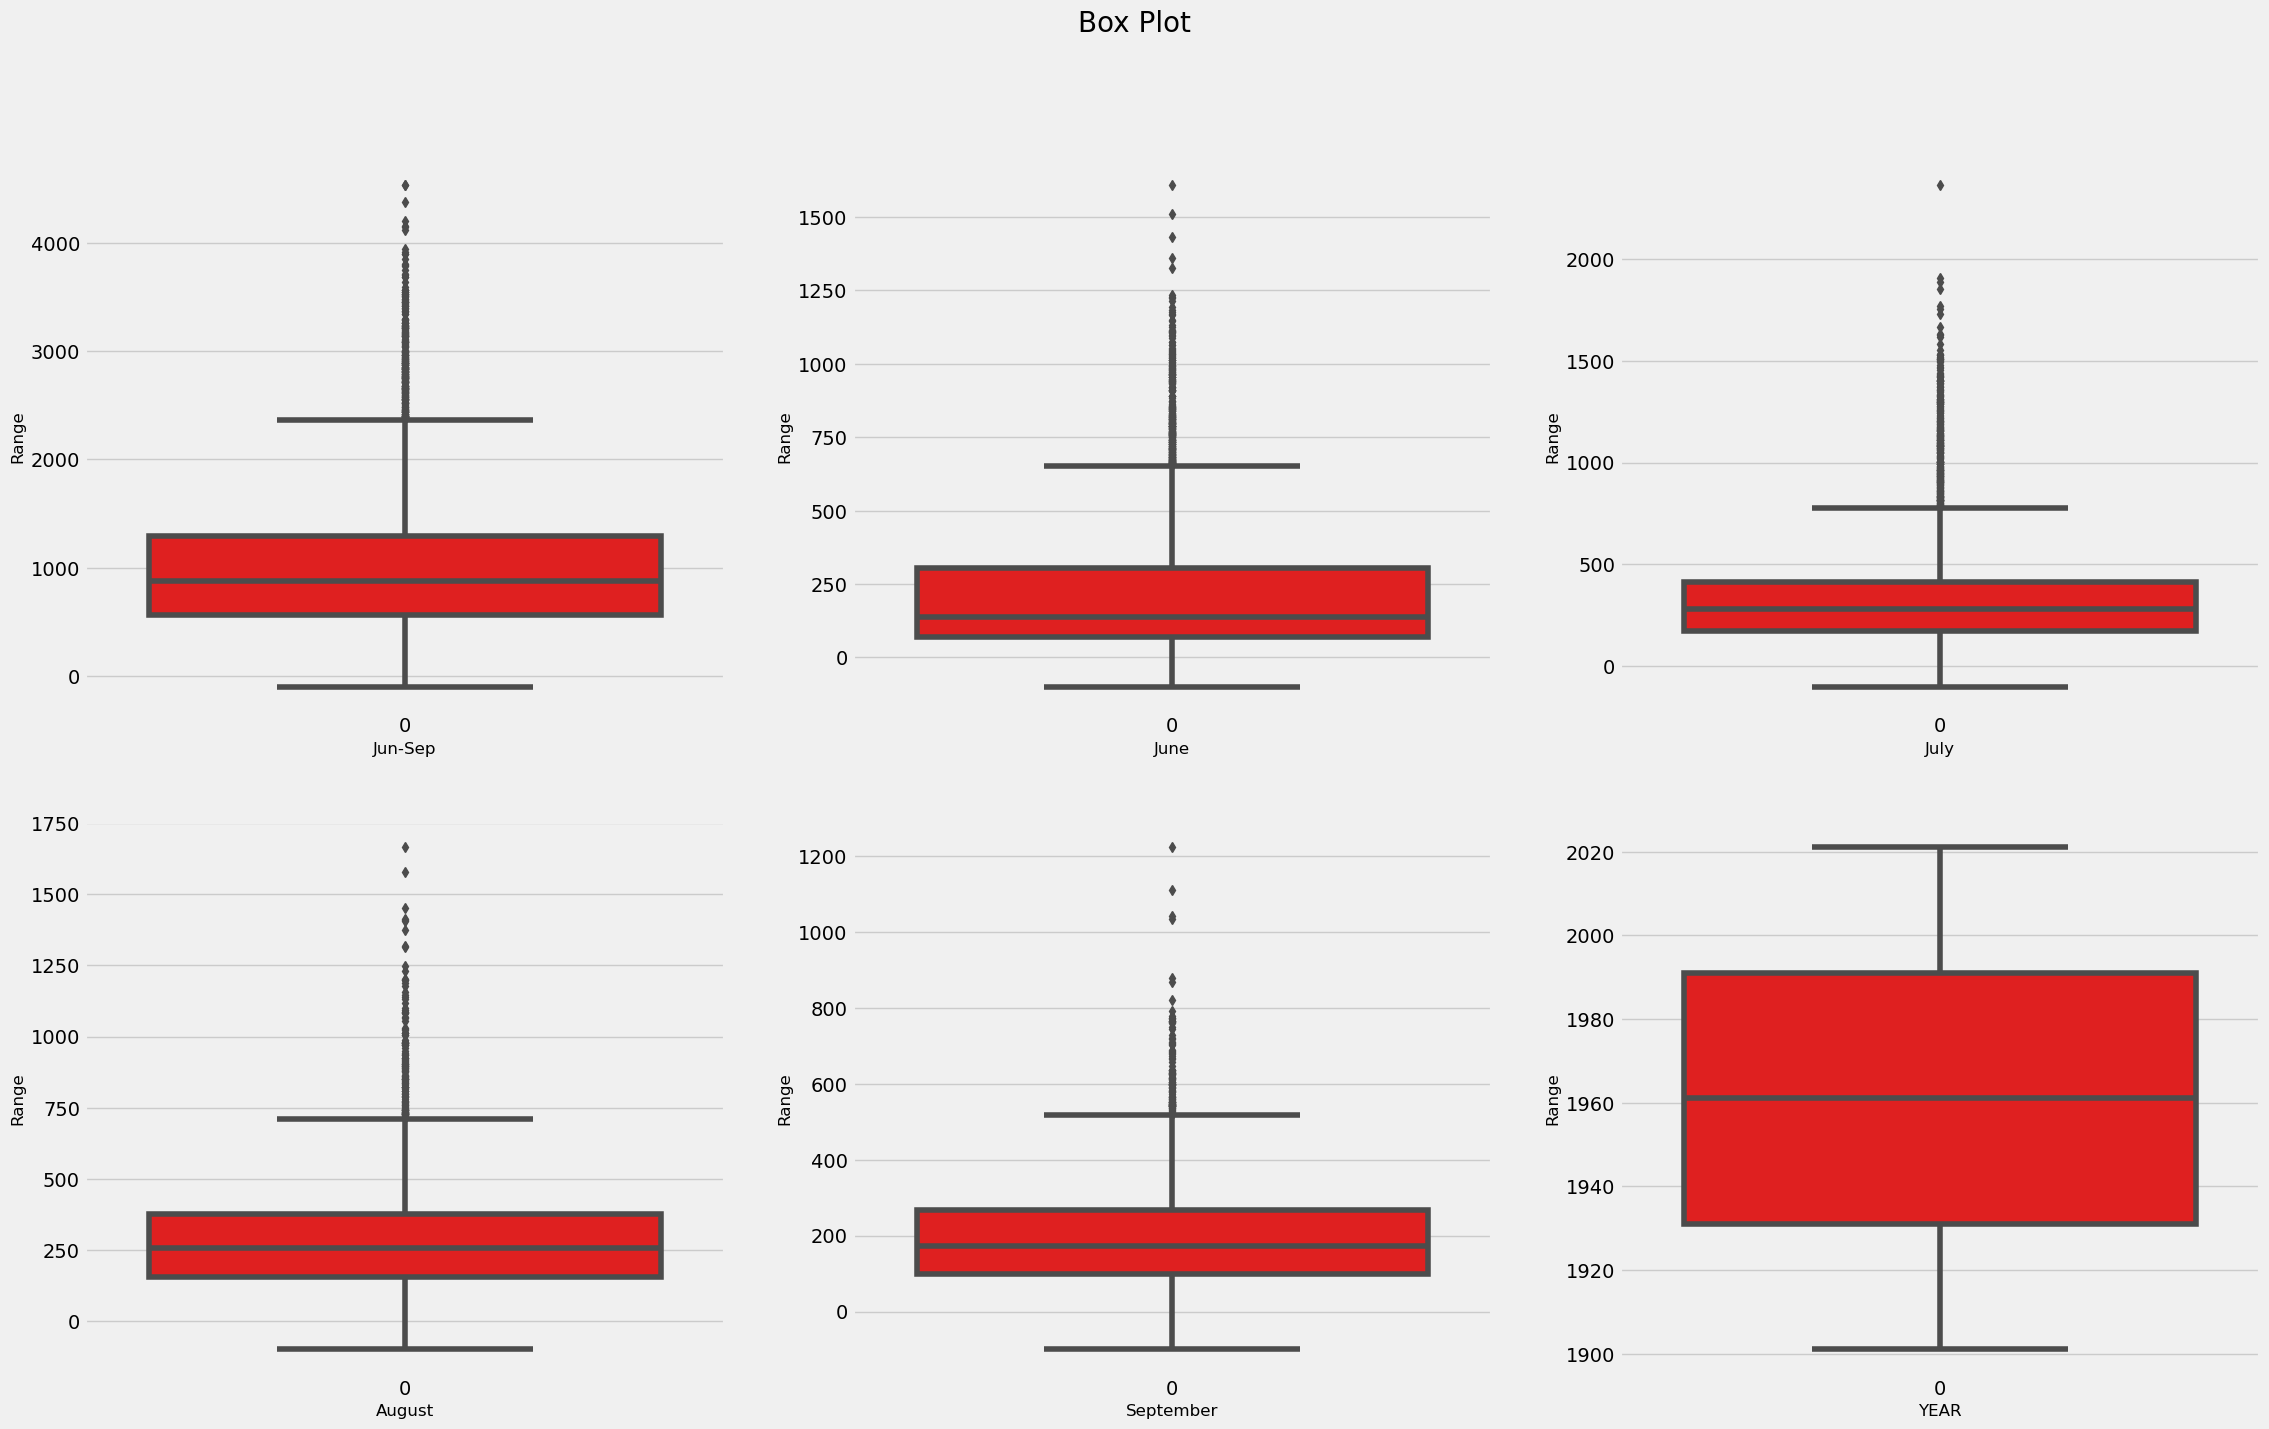

In [58]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (25, 15)
plt.style.use('fivethirtyeight')

# Box plot for JUN-SEP
plt.subplot(2, 3, 1)
sns.boxplot(data['JUN-SEP'], color = 'red')
plt.xlabel('Jun-Sep', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for JUN
plt.subplot(2, 3, 2)
sns.boxplot(data['JUN'], color = 'red')
plt.xlabel('June', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for JUL
plt.subplot(2, 3, 3)
sns.boxplot(data['JUL'], color = 'red')
plt.xlabel('July', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for AUG
plt.subplot(2, 3, 4)
sns.boxplot(data['AUG'], color = 'red')
plt.xlabel('August', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for SEP
plt.subplot(2, 3, 5)
sns.boxplot(data['SEP'], color = 'red')
plt.xlabel('September', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for Year
plt.subplot(2, 3, 6)
sns.boxplot(data['YEAR'], color = 'red')
plt.xlabel('YEAR', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [64]:
data1 = data[data['JUN-SEP']<2050]
data1.shape

(3924, 7)

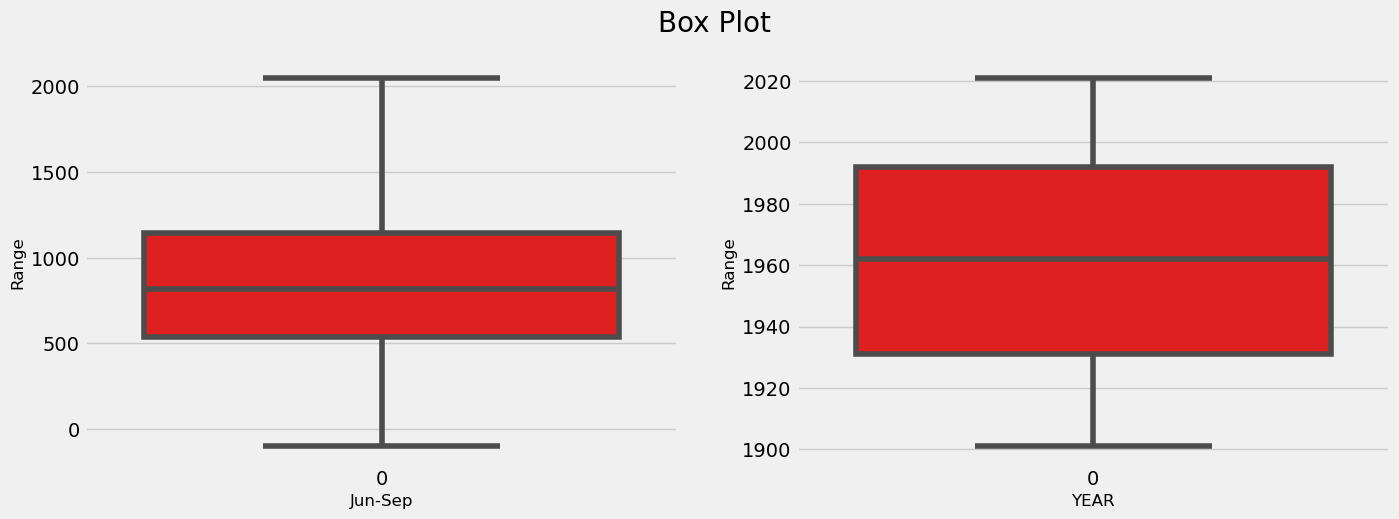

In [65]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for JUN-SEP
plt.subplot(1, 2, 1)
sns.boxplot(data1['JUN-SEP'], color = 'red')
plt.xlabel('Jun-Sep', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for Year
plt.subplot(1, 2, 2)
sns.boxplot(data1['YEAR'], color = 'red')
plt.xlabel('YEAR', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

# Univariate Analysis

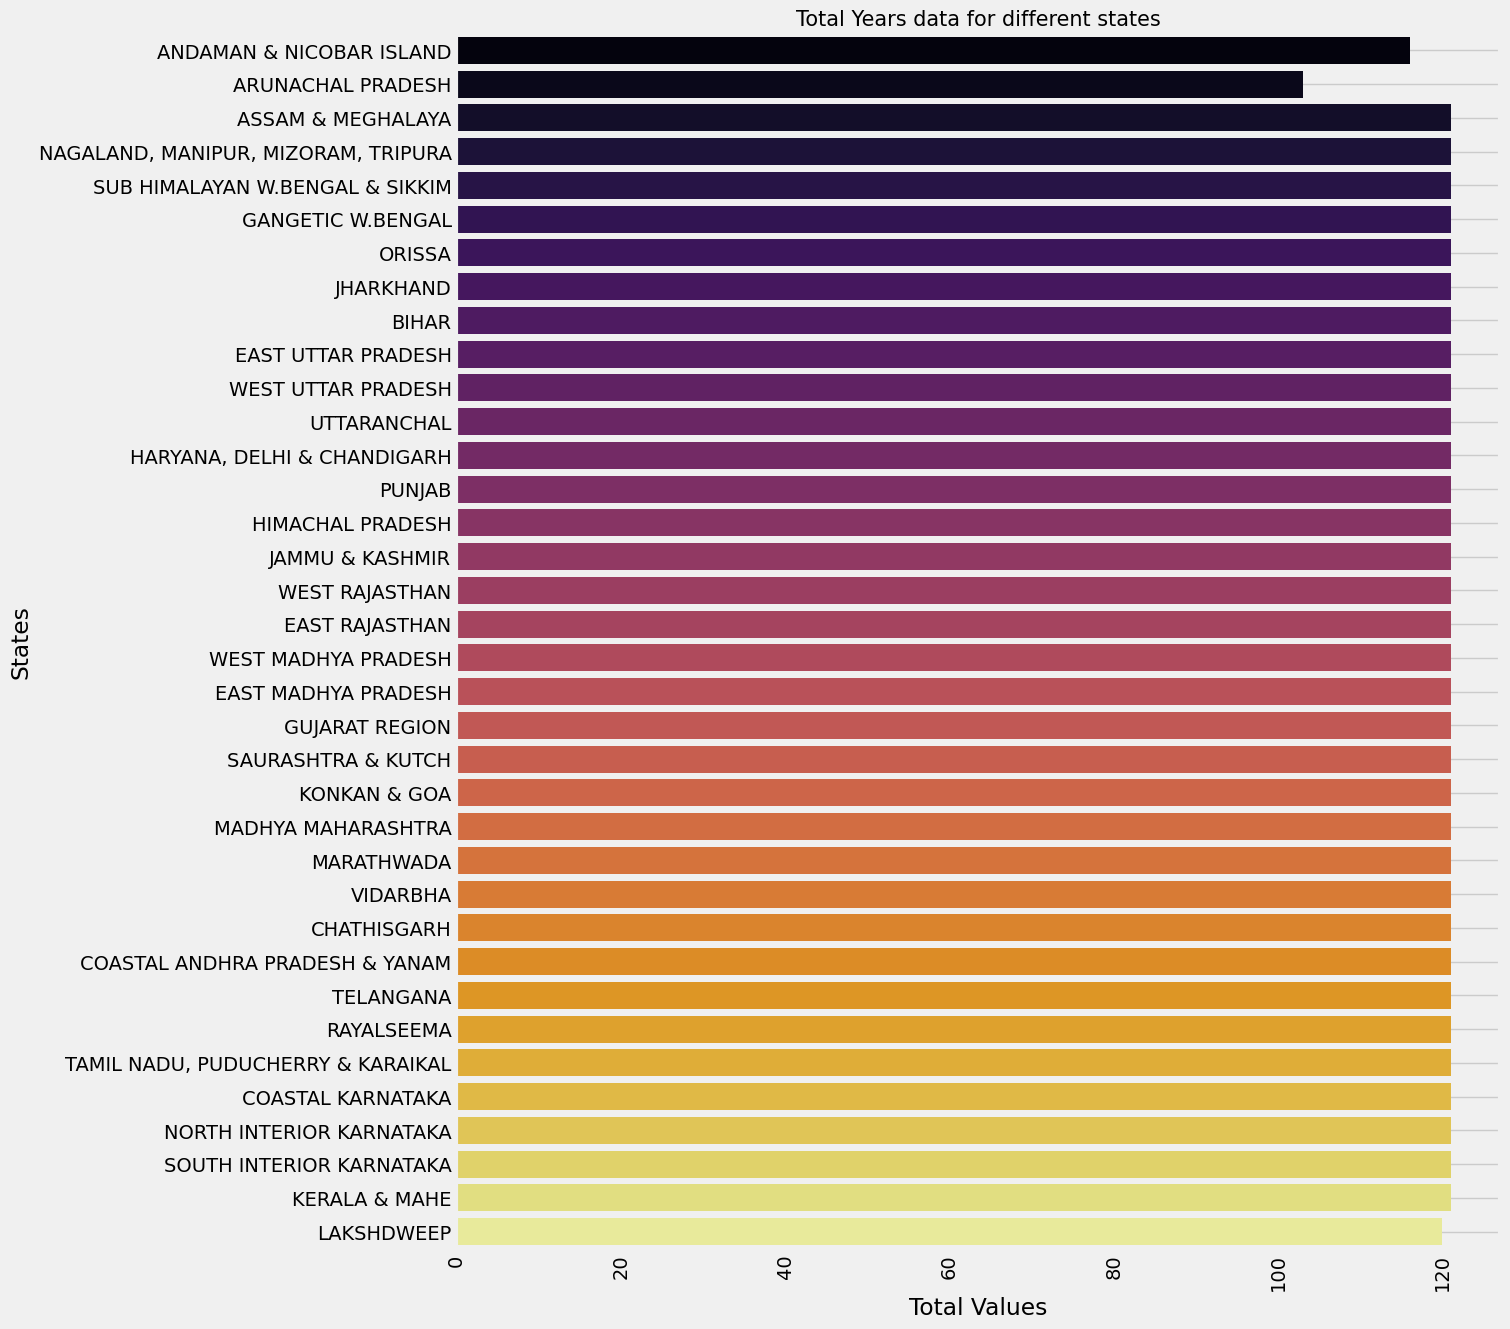

In [21]:
# lets check distribution of different Years

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = data['subdivision'], palette = 'inferno', orient = 'v')
plt.xlabel('Total Values')
plt.ylabel('States')
plt.title('Total Years data for different states', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

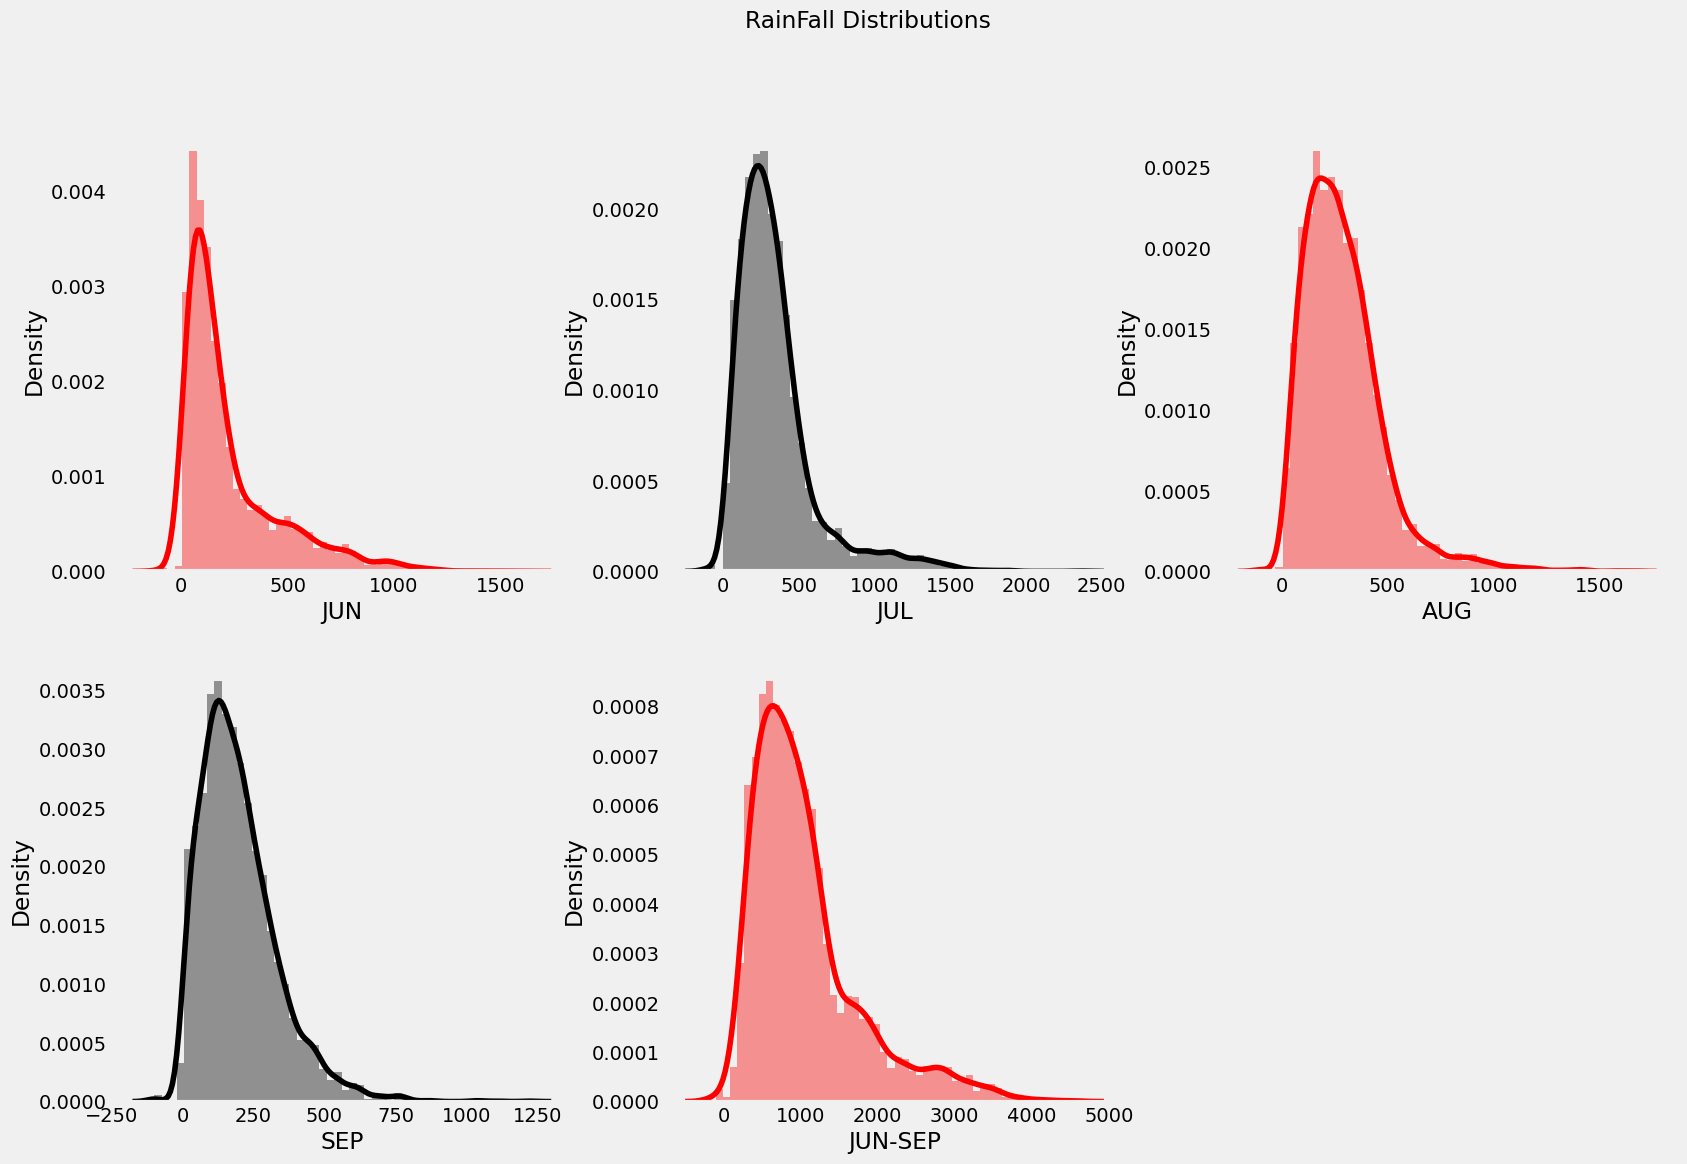

In [33]:
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 3, 1)
sns.distplot(data['JUN'], color = 'red')
plt.grid()

plt.subplot(2, 3, 2)
sns.distplot(data['JUL'], color = 'black')
plt.grid()

plt.subplot(2, 3, 3)
sns.distplot(data['AUG'], color = 'red')
plt.grid()

plt.subplot(2, 3, 4)
sns.distplot(data['SEP'], color = 'black')
plt.grid()

plt.subplot(2, 3, 5)
sns.distplot(data['JUN-SEP'], color = 'red')
plt.grid()



plt.suptitle('RainFall Distributions')
plt.show()

# Bivariate Analysis

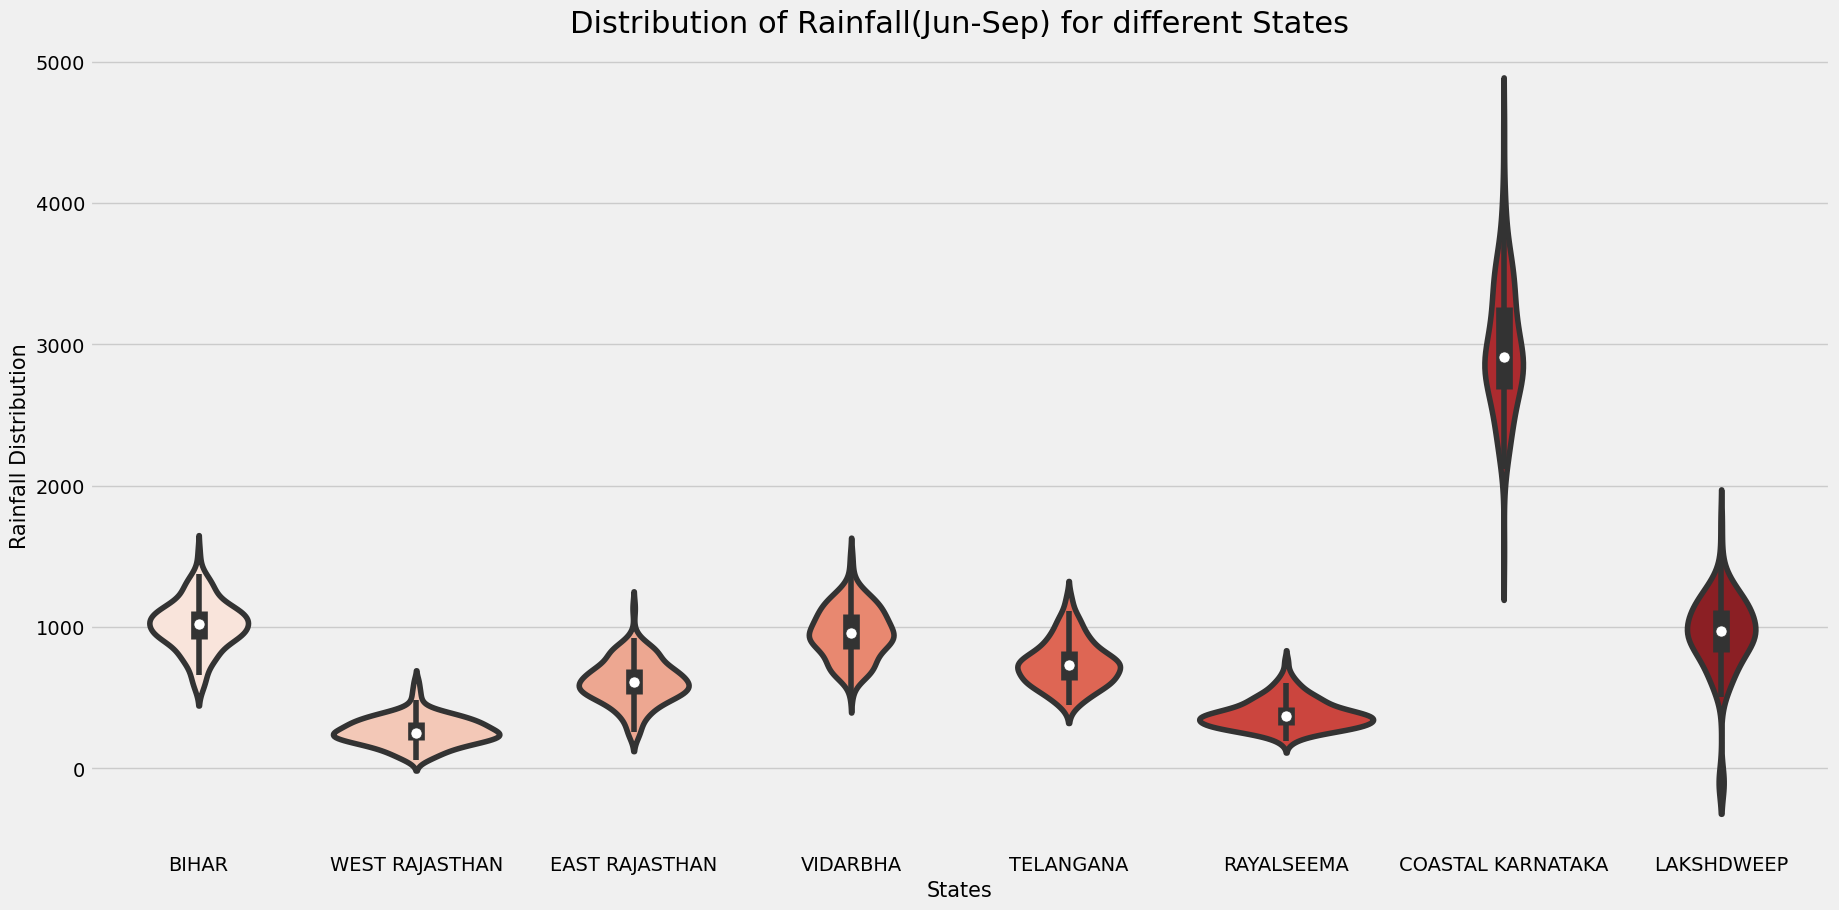

In [74]:
# Some States and their rainfalls
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['JUN-SEP']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.violinplot(x = data_states['subdivision'], y = data_states['JUN-SEP'], palette = 'Reds')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Jun-Sep) for different States', fontsize = 22)
plt.show()

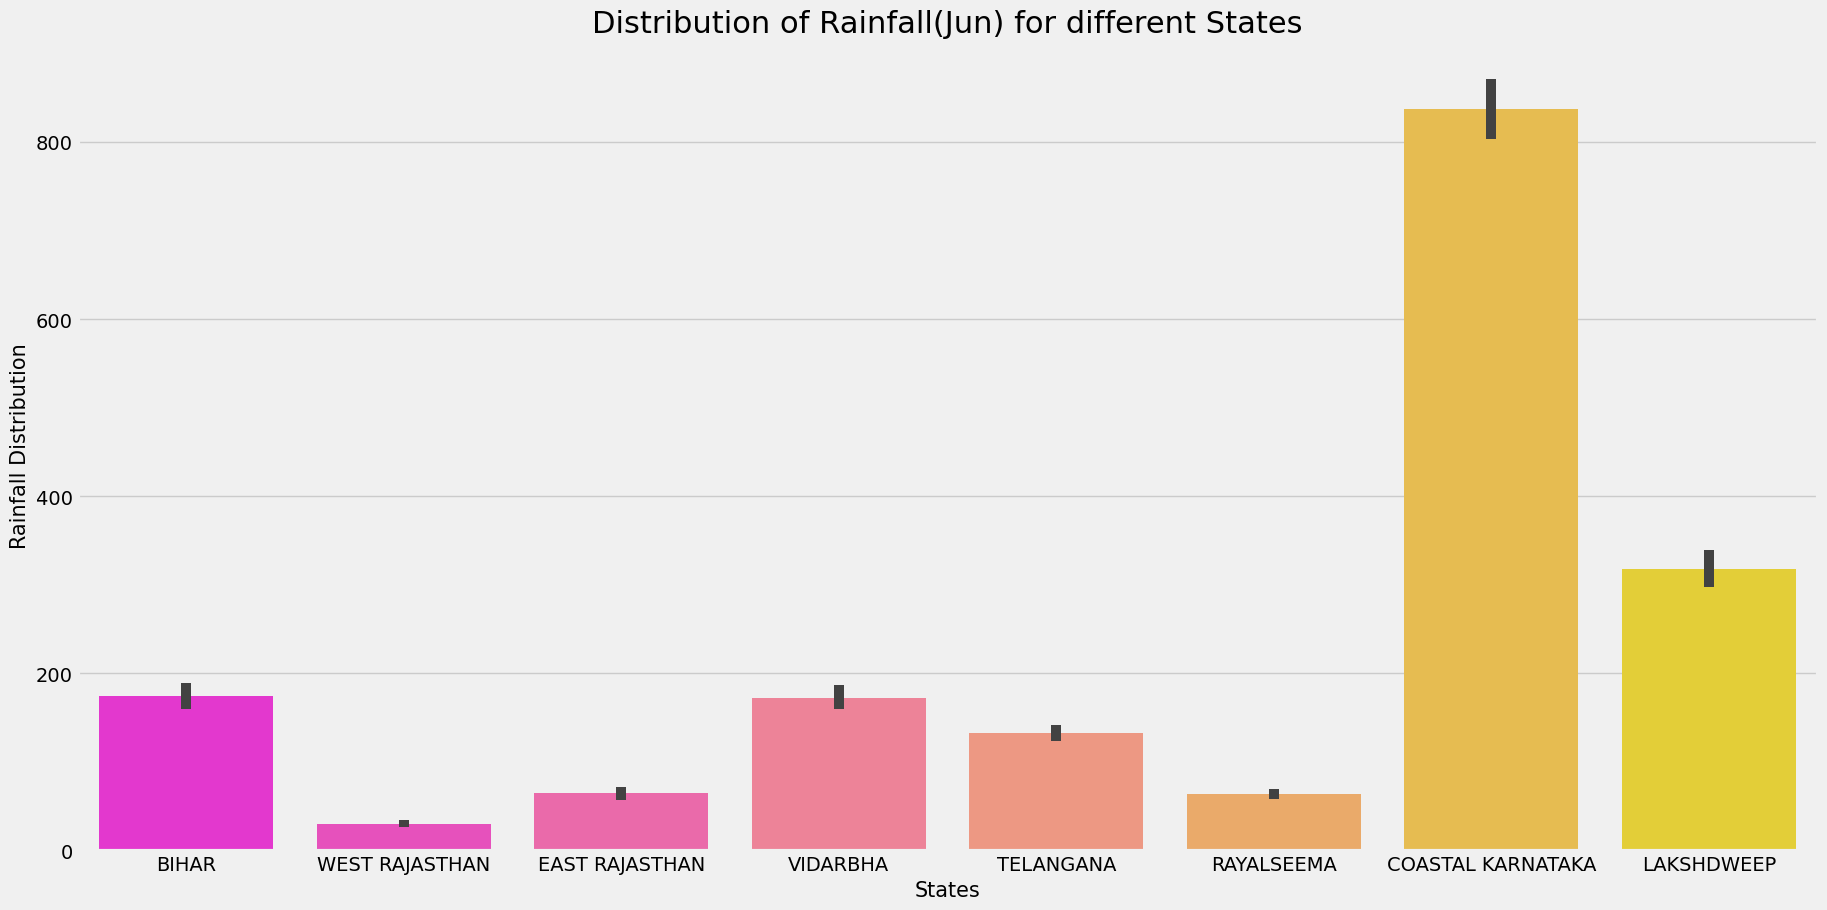

In [87]:
# Some state's and their Rainfalls
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['JUN']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x = data_states['subdivision'], y = data_states['JUN'], palette = 'spring')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Jun) for different States', fontsize = 22)
plt.show()

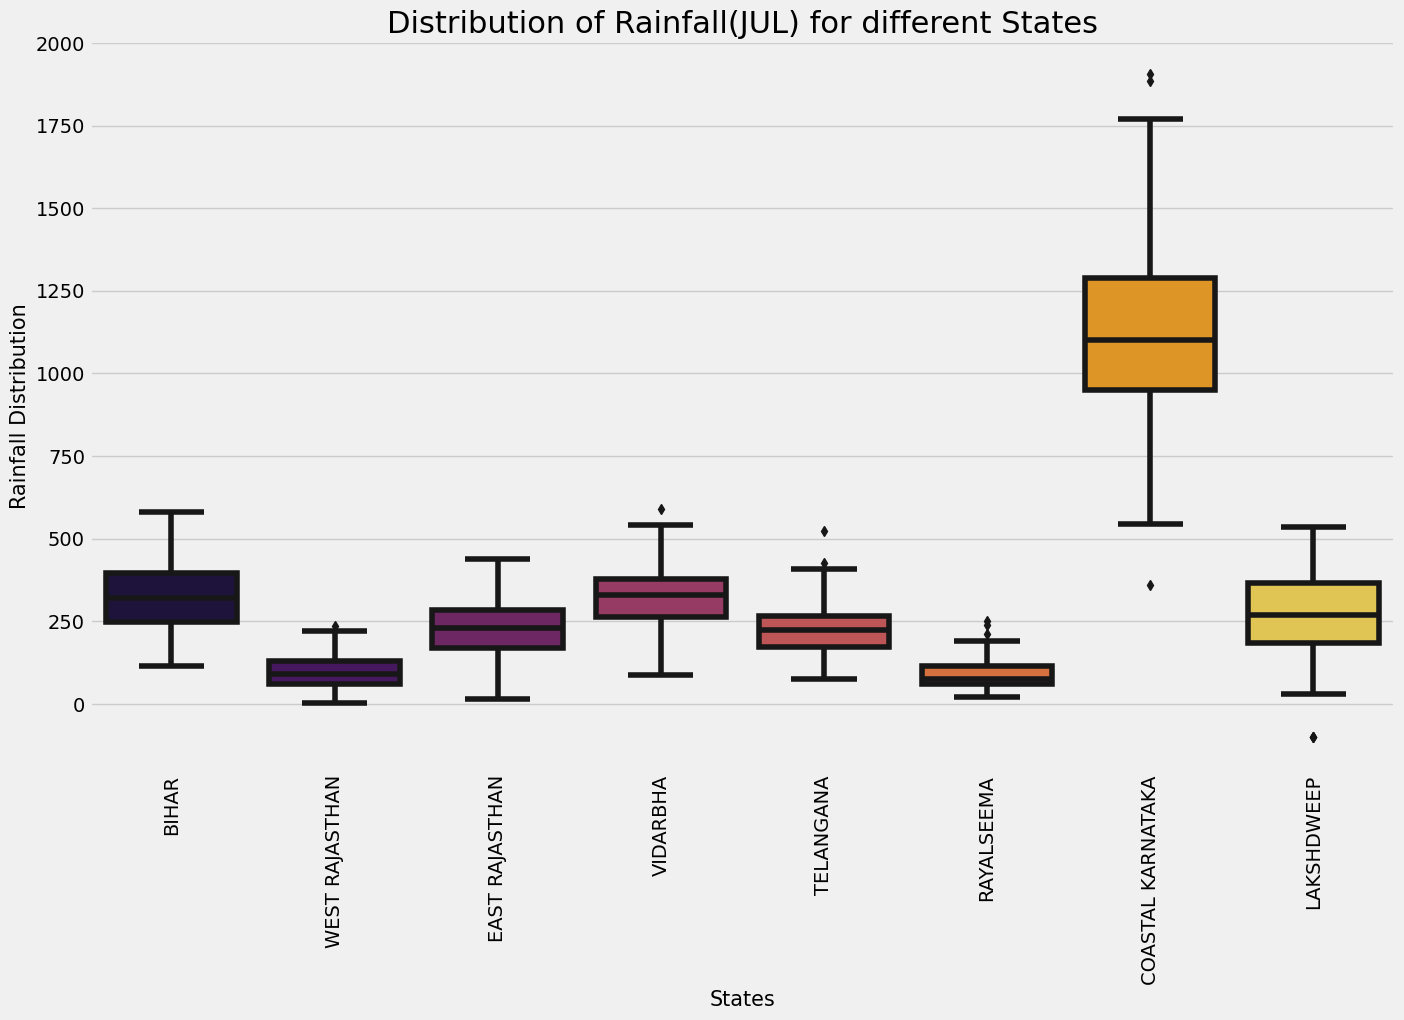

In [85]:
# Some state's and their Rainfalls
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['JUL']]

plt.rcParams['figure.figsize'] = (15, 9)
ax = sns.boxplot(x = data_states['subdivision'], y = data_states['JUL'], palette = 'inferno')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(JUL) for different States', fontsize = 22)
plt.xticks(rotation = 90)
plt.show()

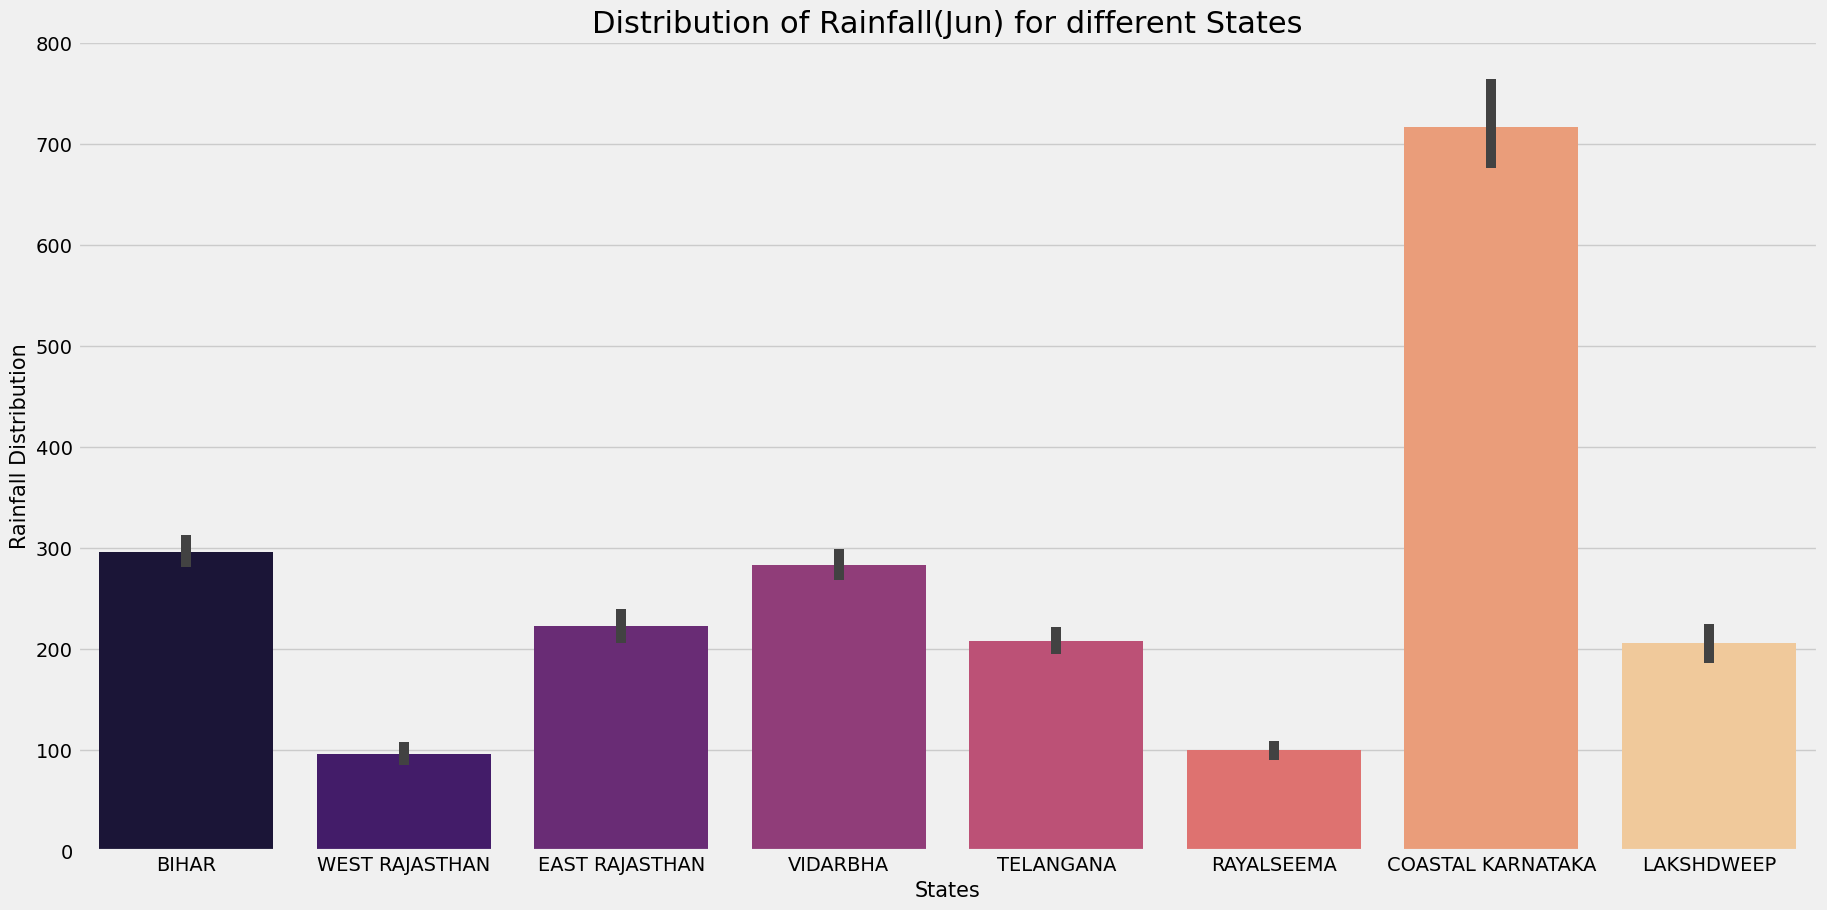

In [88]:
# Some state's and their Rainfalls
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['AUG']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x = data_states['subdivision'], y = data_states['AUG'], palette = 'magma')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Jun) for different States', fontsize = 22)
plt.show()

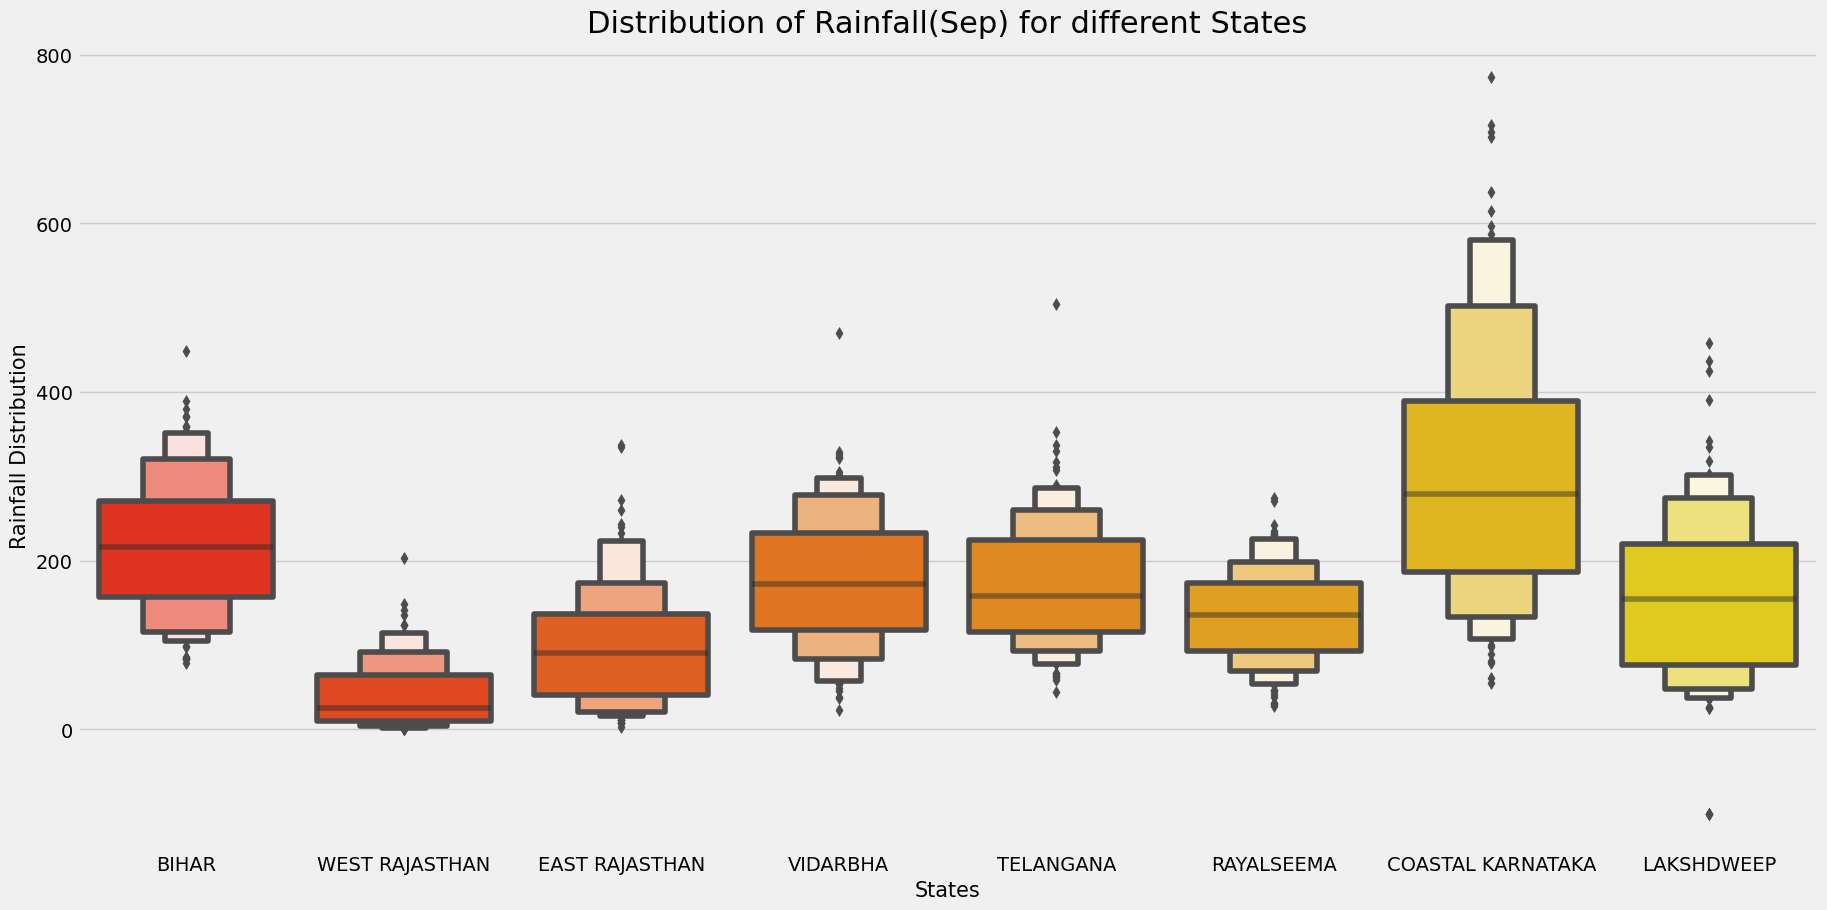

In [86]:
# Some state's and their Rainfalls
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['SEP']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.boxenplot(x = data_states['subdivision'], y = data_states['SEP'], palette = 'autumn')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Sep) for different States', fontsize = 22)
plt.show()

# Multivariate Analysis

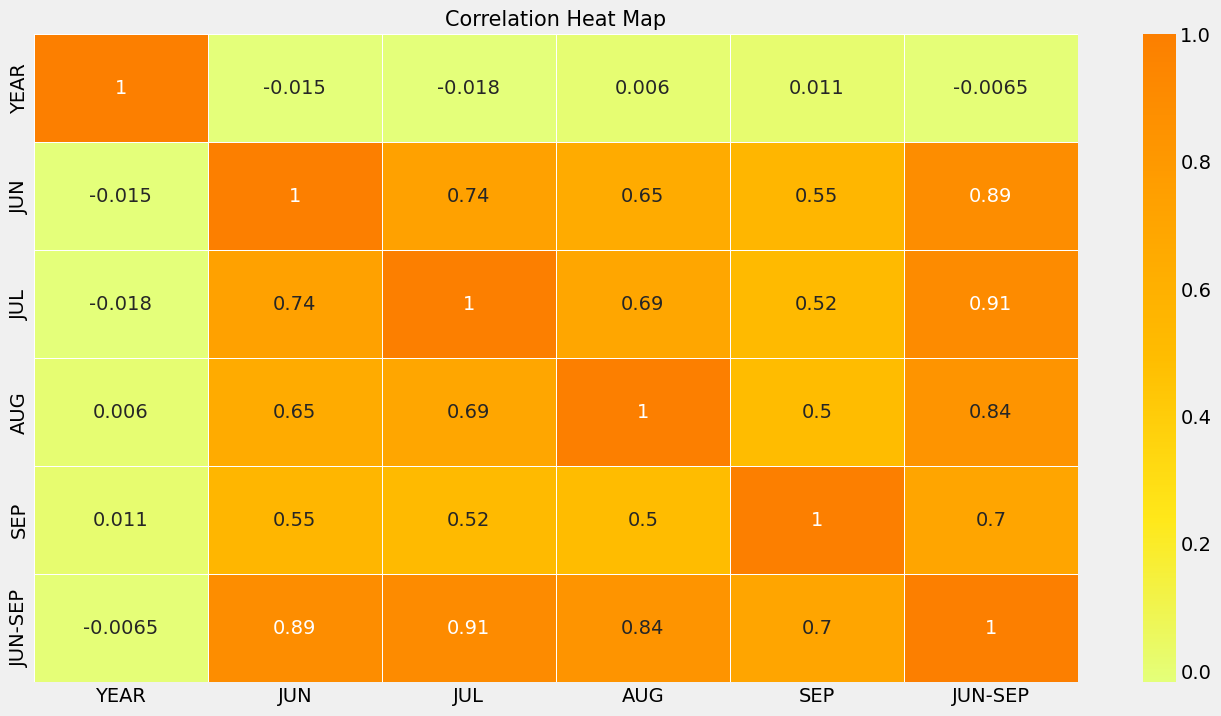

In [34]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()